In [1]:
import pandas as pd
from tqdm import tqdm
from collections import Counter
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [5]:
recs = []
for df in tqdm(pd.read_json("../../data/query/wish_queries_with_timestamp.json", lines=True, chunksize=1000), 
        total=int(530 * 1000_000 / 1000)):
    recs += df.head(1).to_dict('records')

100%|█████████▉| 529100/530000 [1:53:21<00:11, 77.79it/s]  


In [ ]:
df_sample = pd.DataFrame(recs)
# df_sample.to_json('tmp_sample.json', lines=True, orient='records')

In [2]:
df_sample = pd.read_json('tmp_sample.json', lines=True)

In [3]:
Counter(df_sample.min_dt.apply(lambda x: x.split('-')[0]))

Counter({'2020': 293147, '2022': 90573, '2021': 145380})

In [4]:
Counter(df_sample.max_dt.apply(lambda x: x.split('-')[0]))

Counter({'2022': 135757, '2021': 159445, '2020': 233898})

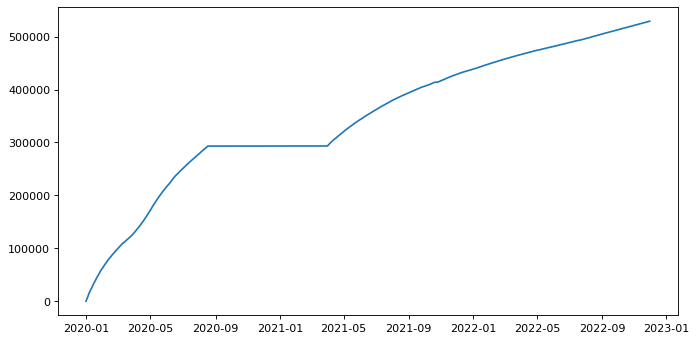

In [5]:
plt.figure(figsize=(10, 5), dpi=80)
plt.plot(df_sample.sort_values('min_timestamp')['min_timestamp'].apply(datetime.datetime.fromtimestamp), 
    np.arange(len(df_sample)))

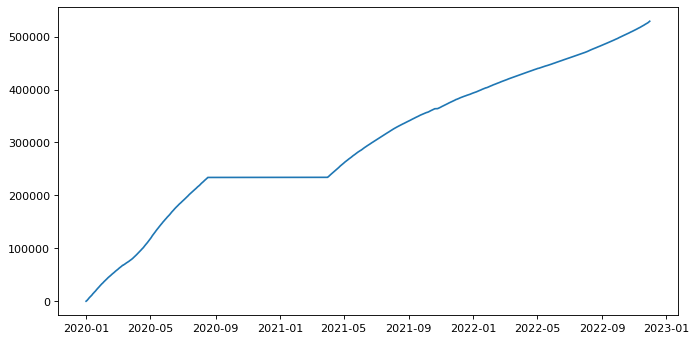

In [6]:
plt.figure(figsize=(10, 5), dpi=80)
plt.plot(df_sample.sort_values('max_timestamp')['max_timestamp'].apply(datetime.datetime.fromtimestamp), 
    np.arange(len(df_sample)))

In [7]:
df_sample_tmp = df_sample.set_index(df_sample['min_timestamp'].apply(datetime.datetime.fromtimestamp))

In [8]:
df_sample_tmp = df_sample_tmp.sort_index()

In [9]:
df_sample_tmp

,query,min_timestamp,max_timestamp,min_dt,max_dt,cnt,gmv
min_timestamp,,,,,,,
2019-12-31 08:00:03,laser lights,1577779203,1669747946,2020-01-01,2022-11-30,39024,7654.572266
2019-12-31 08:00:05,car assecories,1577779205,1669794803,2020-01-01,2022-11-30,521998,8846.156250
2019-12-31 08:00:05,apple watch bands,1577779205,1669788912,2020-01-01,2022-11-30,202702,22162.541016
2019-12-31 08:00:15,portaoggetti per auto,1577779215,1669753175,2020-01-01,2022-11-30,18796,2746.046387
2019-12-31 08:00:19,fundas huawei p30 lite,1577779219,1669588765,2020-01-01,2022-11-28,33310,1538.798218
...,...,...,...,...,...,...,...
2022-11-30 06:32:12,heren winterjassen l,1669789932,1669789932,2022-11-30,2022-11-30,1,0.000000
2022-11-30 07:24:49,gel nail jelly nail polish,1669793089,1669793098,2022-11-30,2022-11-30,2,0.000000
2022-11-30 07:30:44,verstadsklistermärken,1669793444,1669793449,2022-11-30,2022-11-30,5,0.000000


In [10]:
df_sample_tmp['2019-01-01':'2020-01-01']

,query,min_timestamp,max_timestamp,min_dt,max_dt,cnt,gmv
min_timestamp,,,,,,,
2019-12-31 08:00:03,laser lights,1577779203,1669747946,2020-01-01,2022-11-30,39024,7654.572266
2019-12-31 08:00:05,car assecories,1577779205,1669794803,2020-01-01,2022-11-30,521998,8846.156250
2019-12-31 08:00:05,apple watch bands,1577779205,1669788912,2020-01-01,2022-11-30,202702,22162.541016
2019-12-31 08:00:15,portaoggetti per auto,1577779215,1669753175,2020-01-01,2022-11-30,18796,2746.046387
2019-12-31 08:00:19,fundas huawei p30 lite,1577779219,1669588765,2020-01-01,2022-11-28,33310,1538.798218
...,...,...,...,...,...,...,...
2020-01-01 23:58:28,sony boxen,1577923108,1642014861,2020-01-02,2022-01-13,62,0.000000
2020-01-01 23:58:36,lampras de arbol,1577923116,1577923123,2020-01-02,2020-01-02,3,0.000000
2020-01-01 23:58:39,football phone case xr,1577923119,1590185033,2020-01-02,2020-05-23,18,0.000000


In [11]:
begin = datetime.datetime(year=2019, month=12, day=31)
end = datetime.datetime(year=2022, month=11, day=30)

In [12]:
times = []
num_new_queries = []
while True:
    times.append(begin) 
    num_new_queries.append(
        len(df_sample_tmp[begin: begin + datetime.timedelta(days=7)]['query'])
    )
    begin = begin + datetime.timedelta(days=7)
    if begin > end:
        break

Text(0, 0.5, '# new uncached weekly queries')

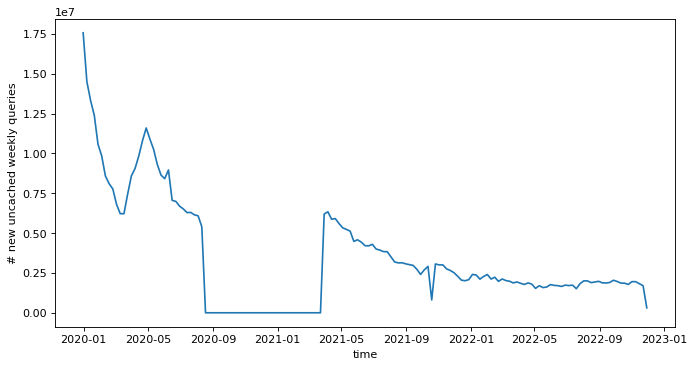

In [13]:
plt.figure(figsize=(10, 5), dpi=80)
plt.plot(times, [i * 1000 for i in num_new_queries])
plt.xlabel('time')
plt.ylabel('# new uncached weekly queries')


Text(0, 0.5, '# new uncached weekly queries')

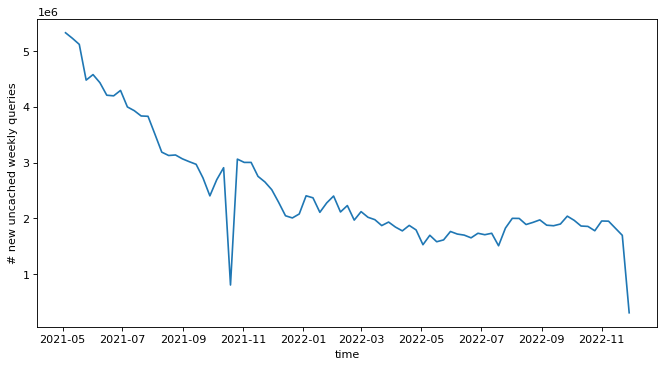

In [88]:
plt.figure(figsize=(10, 5), dpi=80)
plt.plot(times[70:], [i * 1000 for i in num_new_queries][70:])
plt.xlabel('time')
plt.ylabel('# new uncached weekly queries')


In [84]:
print(
    len(num_new_queries[70:]) * 7 / 365, 
    max([i * 1000 for i in num_new_queries][70:]), 
    min([i * 1000 for i in num_new_queries][70:]), 
    np.mean([i * 1000 for i in num_new_queries][70:]), 
    np.median([i * 1000 for i in num_new_queries][70:]), 
)

1.5917808219178082 5330000 308000 2482493.9759036144 2041000.0


In [87]:
print(
    len(num_new_queries[-13:]) * 7 / 365, 
    max([i * 1000 for i in num_new_queries][-13:]), 
    min([i * 1000 for i in num_new_queries][-13:]), 
    np.mean([i * 1000 for i in num_new_queries][-13:]), 
    np.median([i * 1000 for i in num_new_queries][-13:]), 
)

0.2493150684931507 2041000 308000 1760692.3076923077 1869000.0
